In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
#%matplotlib inline  # Configurations

In [2]:
data_path = "/home/simon/eth/asl-fall17-project/experiment-scripts/6_2K_analysis/61_2k/logs/GETS/"
figure_path = "/home/simon/eth/asl-fall17-project/report/Data/51/"

middlewares = [1, 2]
servers = [2, 3]
workerthreads = [8, 32]

# GETs
get_throughput = []
get_throughput_std = []
get_response_time = []
get_response_time_std = []
for xM in middlewares:
    for xS in servers:
        for xW in workerthreads:
            path = data_path + "servers_" + str(xS) + "/mws_" + str(xM) + "/wt_" + str(xW) + "/"
            
            config_rts = []
            config_tps = []
            # Iterate through all clients, instances
            for rep in xrange(1,4):
                rep_total_throughput = 0
                for client in xrange(1,4):
                    for inst in xrange(1,3):
                        filepath = path+"client" + str(client) + "_inst"+str(inst)+"_rep"+str(rep)+".json"
                        data = json.load(open(filepath))['ALL STATS']
                        fields = ['Totals']
                        stats = []
                        for f in fields:
                            if f in data:
                                data[f]["Type"] = f
                                stats.append(data[f])
                        stats = pd.DataFrame(stats)
                        
                        rep_total_throughput += stats['Ops/sec'][0]
                        config_rts.append(stats['Latency'][0])
                config_tps.append(rep_total_throughput)
            get_throughput.append(np.mean(config_tps))
            get_throughput_std.append(np.std(config_tps))
            get_response_time.append(np.mean(config_rts))
            get_response_time_std.append(np.std(config_rts))

# SETs
data_path = "/home/simon/eth/asl-fall17-project/experiment-scripts/6_2K_analysis/61_2k/logs/SETS/"
set_throughput = []
set_throughput_std = []
set_response_time = []
set_response_time_std = []
for xM in middlewares:
    for xS in servers:
        for xW in workerthreads:
            path = data_path + "servers_" + str(xS) + "/mws_" + str(xM) + "/wt_" + str(xW) + "/"
            
            config_rts = []
            config_tps = []
            # Iterate through all clients, instances
            for rep in xrange(1,4):
                rep_total_throughput = 0
                for client in xrange(1,4):
                    for inst in xrange(1,3):
                        filepath = path+"client" + str(client) + "_inst"+str(inst)+"_rep"+str(rep)+".json"
                        data = json.load(open(filepath))['ALL STATS']
                        fields = ['Totals']
                        stats = []
                        for f in fields:
                            if f in data:
                                data[f]["Type"] = f
                                stats.append(data[f])
                        stats = pd.DataFrame(stats)
                        
                        rep_total_throughput += stats['Ops/sec'][0]
                        config_rts.append(stats['Latency'][0])
                config_tps.append(rep_total_throughput)
            set_throughput.append(np.mean(config_tps))
            set_throughput_std.append(np.std(config_tps))
            set_response_time.append(np.mean(config_rts))
            set_response_time_std.append(np.std(config_rts))
            
# GET & SET
data_path = "/home/simon/eth/asl-fall17-project/experiment-scripts/6_2K_analysis/61_2k/logs/GETSET/"
getset_throughput = []
getset_throughput_std = []
getset_response_time = []
getset_response_time_std = []
for xM in middlewares:
    for xS in servers:
        for xW in workerthreads:
            path = data_path + "servers_" + str(xS) + "/mws_" + str(xM) + "/wt_" + str(xW) + "/"
            
            config_rts = []
            config_tps = []
            # Iterate through all clients, instances
            for rep in xrange(1,4):
                rep_total_throughput = 0
                for client in xrange(1,4):
                    for inst in xrange(1,3):
                        filepath = path+"client" + str(client) + "_inst"+str(inst)+"_rep"+str(rep)+".json"
                        data = json.load(open(filepath))['ALL STATS']
                        fields = ['Totals']
                        stats = []
                        for f in fields:
                            if f in data:
                                data[f]["Type"] = f
                                stats.append(data[f])
                        stats = pd.DataFrame(stats)
                        
                        rep_total_throughput += stats['Ops/sec'][0]
                        config_rts.append(stats['Latency'][0])
                config_tps.append(rep_total_throughput)
            getset_throughput.append(np.mean(config_tps))
            getset_throughput_std.append(np.std(config_tps))
            getset_response_time.append(np.mean(config_rts))
            getset_response_time_std.append(np.std(config_rts))


# i = -1
# for xM in middlewares:
#     for xS in servers:
#         for xW in workerthreads:
#             i += 1
#             print("Middlewares: " + str(xM) + "  Servers: " + str(xS) + "  WT: " + str(xW) )
#             print("Throughput: " + str(get_throughput[i]) + " +- " + str(get_throughput_std[i]))
#             print("Response Time: " + str(get_response_time[i]) + " +- " + str(get_response_time_std[i]))
#             print

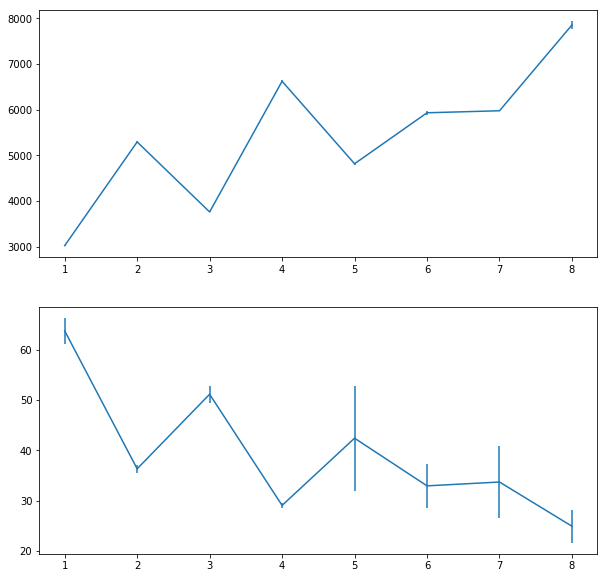

In [3]:
np.set_printoptions(suppress=True)
table = []
# GETS
a = [[1,-1,-1,-1,1,1,1,-1],
     [1,1,-1,-1,-1,-1,1,1],
     [1,-1,1,-1,-1,1,-1,1],
     [1,1,1,-1,1,-1,-1,-1],
     [1,-1,-1,1,1,-1,-1,1],
     [1,1,-1,1,-1,1,-1,-1],
     [1,-1,1,1,-1,-1,1,-1],
     [1,1,1,1,1,1,1,1]]
a= np.array(a)
y_tp = get_throughput
y_rt = get_response_time
print("Effects for GET requests:")
print("I xW xS xM xW*xS xW*xM xS*xM xW*xS*xM")
table.append("I xW xS xM xW*xS xW*xM xS*xM xW*xS*xM")
print("Throughput:")
sol_tp = np.linalg.solve(a,y_tp)
# print(sol_tp)
# Response Time
print("Response Time:")
sol_rt = np.linalg.solve(a,y_rt)
# print(sol_rt)
# Variation allocation
SS_tp = 8*np.power(sol_tp[1:],2)
variation_tp = 100*SS_tp/np.sum(SS_tp)

SS_rt = 8*np.power(sol_rt[1:],2)
variation_rt = 100*SS_rt/np.sum(SS_rt)

print variation_tp
print variation_rt

table.append("GET")
table.append(variation_tp)
table.append(variation_rt)

# SETS
y_tp = set_throughput
y_rt = set_response_time
print
print("Effects for SET requests:")
print("xW xS xM xW*xS xW*xM xS*xM xW*xS*xM")
print("Throughput:")
sol_tp = np.linalg.solve(a,y_tp)
# print(sol_tp)
# Response Time
print("Response Time:")
sol_rt = np.linalg.solve(a,y_rt)
# print(sol_rt)
# Variation allocation
SS_tp = 8*np.power(sol_tp[1:],2)
variation_tp = 100*SS_tp/np.sum(SS_tp)

SS_rt = 8*np.power(sol_rt[1:],2)
variation_rt = 100*SS_rt/np.sum(SS_rt)

print variation_tp
print variation_rt

table.append("SET")
table.append(variation_tp)
table.append(variation_rt)


# GETSET
y_tp = getset_throughput
y_rt = getset_response_time
print
print("Effects for mixed requests:")
print("xW xS xM xW*xS xW*xM xS*xM xW*xS*xM")
print("Throughput:")
sol_tp = np.linalg.solve(a,y_tp)
# print(sol_tp)
# Response Time
print("Response Time:")
sol_rt = np.linalg.solve(a,y_rt)
# print(sol_rt)
# Variation allocation
SS_tp = 8*np.power(sol_tp[1:],2)
variation_tp = 100*SS_tp/np.sum(SS_tp)

SS_rt = 8*np.power(sol_rt[1:],2)
variation_rt = 100*SS_rt/np.sum(SS_rt)
table.append("mixed")
table.append(variation_tp)
table.append(variation_rt)
print variation_tp
print variation_rt

# Write to file
import distutils.dir_util
p = figure_path + "61_effects/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write(str(table))
f.close()


Effects for GET requests:
I xW xS xM xW*xS xW*xM xS*xM xW*xS*xM
Throughput:
Response Time:
[ 49.07143106  19.70104166  25.68128966   1.35981651   3.39702121
   0.7674977    0.0219022 ]
[ 50.35665238  14.69182326  23.50618721   0.39699377  10.70426266
   0.10739282   0.23668789]

Effects for SET requests:
xW xS xM xW*xS xW*xM xS*xM xW*xS*xM
Throughput:
Response Time:
[ 74.05188576   5.34403184  19.42482003   0.57137836   0.16381906
   0.08359778   0.36046716]
[ 79.61217884   3.38156767  14.57261897   0.00976863   2.12673384
   0.0035983    0.29353374]

Effects for mixed requests:
xW xS xM xW*xS xW*xM xS*xM xW*xS*xM
Throughput:
Response Time:
[ 70.75834227   1.3676794   26.44998232   0.01211751   0.96532151
   0.03132402   0.41523296]
[ 69.32434304   1.69406401  22.01742738   0.33053085   6.08194963
   0.07158562   0.48009947]
